In [1]:
import chilife as xl
import pickle
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('chiLife')

C:\Program Files\Python310\lib\site-packages\ipykernel\parentpoller.py:110: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn(
C:\Program Files\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('R1_Data.pkl', 'rb') as f:
    data = pickle.load(f)
omp = xl.fetch('1omp')
anf = xl.fetch('1anf')

In [3]:
def my_sfxn(rotlib):
    weight = 0.078 
    f = 0.94
    lj_E = xl.get_lj_energy(rotlib, forgive=f)
    SASA = rotlib.get_sasa()
    return lj_E - weight * SASA  

SL1 = xl.SpinLabel('R1M', 41, anf, energy_func=my_sfxn)
SL2 = xl.SpinLabel('R1M', 238, anf, energy_func=my_sfxn)
SL2 = xl.SpinLabel('R1M', 345, anf, energy_func=my_sfxn)

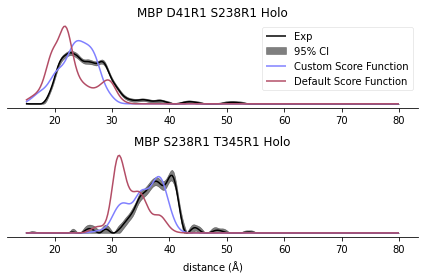

In [4]:
labels = ('Custom Score Function', 'Default Score Function')
fig, axs = plt.subplots(2)
for ax, cstruct in zip(axs, (("41", "238", 'Holo'), ("238", "345", 'Holo'))):
    exp = data[cstruct]
    ax.plot(exp.r, exp.P, color='k', label='Exp')
    ax.fill_between(exp.r, *exp.P95, color='k', alpha=0.5, label='95% CI')
    
    for i, efunc in enumerate((my_sfxn, xl.get_lj_scwrl)):
        SL1 = xl.SpinLabel('R1M', cstruct[0], anf, energy_func = efunc)
        SL2 = xl.SpinLabel('R1M', cstruct[1], anf, energy_func = efunc)
        dd = xl.distance_distribution(SL1, SL2, exp.r)
        ax.plot(exp.r, dd, label=labels[i])
        
    ax.set_yticks([])
    for spine in ['left', 'top', 'right']:
        ax.spines[spine].set_visible(False)

axs[0].set_title('MBP D41R1 S238R1 Holo')
axs[1].set_title('MBP S238R1 T345R1 Holo')
        
axs[0].legend()
axs[1].set_xlabel(r'distance ($\rm\AA$)')

plt.tight_layout()
plt.show()

    




In [5]:
fig.savefig('Custom score func example.png', dpi=1000, bbox_inches='tight')